In [1]:
import pandas as pd
penguins = pd.read_csv('penguins_size.csv').dropna()
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Text(0.5, 1.0, 'Body Mass as a function of the flipper length')

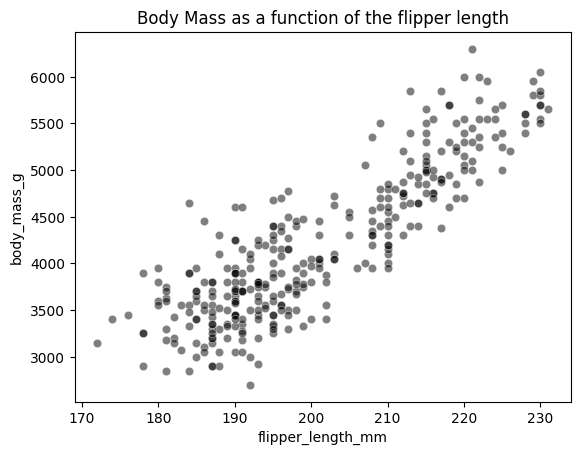

In [2]:
import seaborn as sns

feature_name = "flipper_length_mm"
target_name = 'body_mass_g'
data,target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins,x=feature_name,y=target_name,color='black',alpha=0.5
)
ax.set_title('Body Mass as a function of the flipper length')

In [3]:
def linear_model_flipper_mass(
    flipper_length,weight_flipper_length,intercept_body_mass
):
    """Linear model of the form y = a * x + b """
    body_mass=weight_flipper_length*flipper_length + intercept_body_mass
    return body_mass

In [4]:
import numpy as np

weight_flipper_length=45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(),data.max(),300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range,weight_flipper_length,intercept_body_mass
)

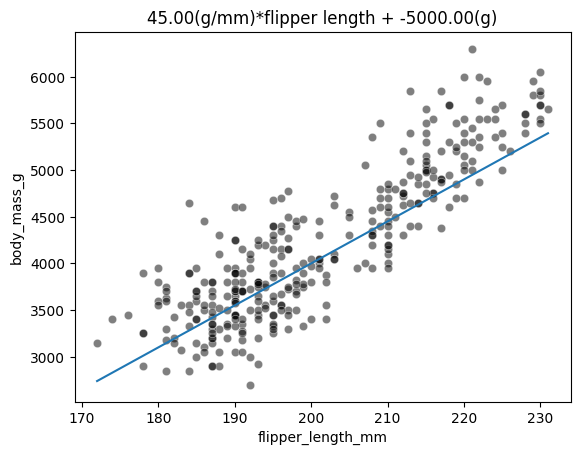

In [5]:
label = "{0:.2f}(g/mm)*flipper length + {1:.2f}(g)"
ax = sns.scatterplot(
    data=penguins,x=feature_name,y=target_name,color='black',alpha = 0.5
)
ax.plot(flipper_length_range,predicted_body_mass)
_= ax.set_title(label.format(weight_flipper_length,intercept_body_mass))

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data,target)

LinearRegression()

In [7]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

50.12002240652991

In [8]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5865.817917221591

In [9]:
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

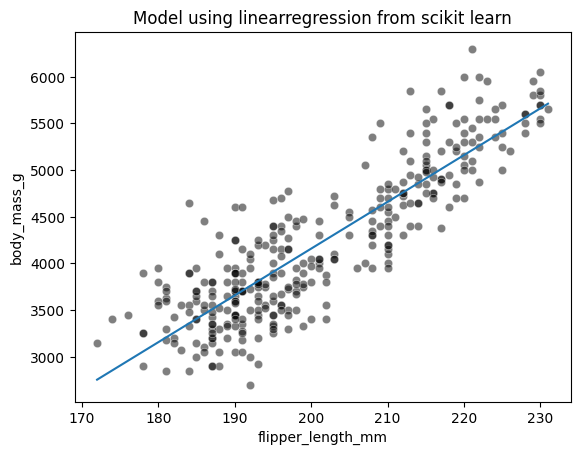

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name],y=target,color = 'black',alpha = 0.5)
plt.plot(flipper_length_range,predicted_body_mass)
_=plt.title("Model using linearregression from scikit learn")

In [14]:
from sklearn.metrics import mean_squared_error
inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target,inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 153384.36


In [15]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target,inferred_body_mass)
print(f"The mean absolut error of the optimal model is {model_error:.2f}g")


The mean absolut error of the optimal model is 311.52g
